In [1]:
# vs code写代码时候执行
import sys, os
sys.path.append("..")  # 跳到上级目录下面（sys.path添加目录时注意是在windows还是在Linux下，windows下需要‘\\'否则会出错。）
colab_path = "."
if os.path.exists(colab_path):
    sys.path.append(colab_path)

In [2]:
# 如果你的Notebook运行时不能实时反应import的.py文件的代码变化
# 特别是当你同时在.py文件里写写改改然后在Notebook里尝试运行它的时候

# 在Notebook里添加自动重新加载
%load_ext autoreload
%autoreload 2

In [60]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering, DBSCAN, KMeans, AgglomerativeClustering
from skfuzzy.cluster import cmeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score #轮廓系数
import scikitplot as skplt
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import matplotlib

In [61]:
plt.style.use(['science', 'grid', 'no-latex'])
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1

# 设置保存图片的格式和dpi
matplotlib.rcParams['savefig.dpi'] = 600
matplotlib.rcParams['savefig.format'] = 'svg'

In [62]:
df = pd.read_excel("./数据.xlsx", sheet_name=0, index_col=0).T

In [63]:
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1,0.0,0.0,0.0,0.0,0.0,0.0,6.122449,24.489796,53.061224,91.836735,...,167.346939,159.183673,142.857143,114.285714,83.673469,44.897959,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,6.183673,25.469388,57.836735,92.755102,...,177.387755,163.959184,152.857143,115.428571,83.673469,45.346939,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,6.734694,24.734694,54.122449,92.755102,...,175.714286,173.510204,145.714286,117.714286,83.673469,47.142857,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,6.551020,24.979592,53.061224,93.673469,...,182.408163,175.102041,148.571429,117.714286,87.020408,48.938776,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,6.673469,25.469388,54.122449,91.836735,...,167.346939,165.551020,150.000000,123.428571,87.857143,48.489796,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,6.183673,24.489796,54.653061,93.673469,...,167.346939,170.326531,147.142857,125.714286,87.020408,46.244898,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,6.489796,26.204082,56.244898,93.673469,...,174.040816,163.959184,145.714286,118.857143,89.530612,44.897959,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,6.183673,25.469388,57.306122,99.183673,...,172.367347,162.367347,142.857143,117.714286,86.183673,48.489796,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,6.306122,24.489796,54.653061,95.510204,...,174.040816,171.918367,145.714286,118.857143,89.530612,47.591837,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,6.612245,26.938776,58.367347,96.428571,...,170.693878,167.142857,152.857143,116.571429,83.673469,48.489796,0.0,0.0,0.0,0.0


### <font color=red><font face="楷体">聚类方法对比

In [64]:
from sklearn.decomposition import PCA
import copy

In [65]:
copyResult = copy.deepcopy(df)
copyResult

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1,0.0,0.0,0.0,0.0,0.0,0.0,6.122449,24.489796,53.061224,91.836735,...,167.346939,159.183673,142.857143,114.285714,83.673469,44.897959,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,6.183673,25.469388,57.836735,92.755102,...,177.387755,163.959184,152.857143,115.428571,83.673469,45.346939,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,6.734694,24.734694,54.122449,92.755102,...,175.714286,173.510204,145.714286,117.714286,83.673469,47.142857,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,6.551020,24.979592,53.061224,93.673469,...,182.408163,175.102041,148.571429,117.714286,87.020408,48.938776,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,6.673469,25.469388,54.122449,91.836735,...,167.346939,165.551020,150.000000,123.428571,87.857143,48.489796,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,6.183673,24.489796,54.653061,93.673469,...,167.346939,170.326531,147.142857,125.714286,87.020408,46.244898,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,6.489796,26.204082,56.244898,93.673469,...,174.040816,163.959184,145.714286,118.857143,89.530612,44.897959,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,6.183673,25.469388,57.306122,99.183673,...,172.367347,162.367347,142.857143,117.714286,86.183673,48.489796,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,6.306122,24.489796,54.653061,95.510204,...,174.040816,171.918367,145.714286,118.857143,89.530612,47.591837,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,6.612245,26.938776,58.367347,96.428571,...,170.693878,167.142857,152.857143,116.571429,83.673469,48.489796,0.0,0.0,0.0,0.0


In [66]:
# 数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #实例化
scaler = scaler.fit(copyResult) #fit，在这里本质是生成min(x)和max(x)
MinMaxScaler_features = scaler.transform(copyResult) #通过接口导出结果

MinMaxScaler_features

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.1       , 0.4       , 0.9       , 0.1       ,
        0.5       , 0.1       , 0.3       , 0.9       , 0.6       ,
        0.3       , 0.77777778, 0.1       , 0.        , 0.1       ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.1       , 0.2       , 0.1       ,
        0.4       , 0.3       , 0.3       , 0.        , 0.5       ,
        0.9       , 0.22222222, 0.3       , 0.        , 0.5       ,
        0.        , 0.        , 0.        , 0.        ],
       [0.   

In [67]:
pca = PCA(n_components=0.85,svd_solver="full") #实例化
pca = pca.fit(MinMaxScaler_features) #拟合模型
PCA_behavior_features = pca.transform(MinMaxScaler_features)

PCA_behavior_features.shape

(30, 9)

In [68]:
pca.explained_variance_ratio_.sum()

0.8948431599147628

In [69]:
pca.explained_variance_ratio_

array([0.20741263, 0.13172933, 0.11410534, 0.10567242, 0.09164481,
       0.07847491, 0.06716478, 0.05234425, 0.04629469])

In [70]:
pca.explained_variance_

array([0.30189319, 0.19173465, 0.16608258, 0.15380829, 0.13339083,
       0.11422179, 0.09775967, 0.07618809, 0.06738283])

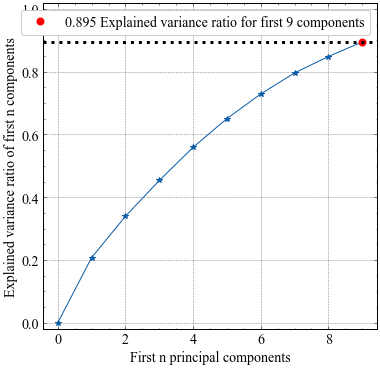

In [71]:
# 绘图
skplt.decomposition.plot_pca_component_variance(pca,target_explained_variance=0.85,figsize=(6,6)
                                                ,title=None)
plt.savefig('./run/figure/PCA累积贡献率',bbox_inches='tight')
plt.show()

In [72]:
CH_Score = []
Sil_Score = []
DBS_Score = []
for coef in range(2,9):
    # 追加CH分数Calinski Harabasz Score
    Sil_Score.append([coef
                    ,silhouette_score(PCA_behavior_features, KMeans(n_clusters=coef,random_state=10).fit(PCA_behavior_features).labels_)
                    ,silhouette_score(PCA_behavior_features, SpectralClustering(n_clusters=coef, random_state=0, affinity='rbf').fit_predict(PCA_behavior_features))
                    # ,davies_bouldin_score()
                    ])

    # 追加轮廓系数
    CH_Score.append([coef
                    ,calinski_harabasz_score(PCA_behavior_features, KMeans(n_clusters=coef,random_state=10).fit(PCA_behavior_features).labels_)
                    ,calinski_harabasz_score(PCA_behavior_features, SpectralClustering(n_clusters=coef, random_state=0, affinity='rbf').fit_predict(PCA_behavior_features))
                    ])

    # 追加DBS系数
    DBS_Score.append([coef
                    ,davies_bouldin_score(PCA_behavior_features, KMeans(n_clusters=coef,random_state=10).fit(PCA_behavior_features).labels_)
                    ,davies_bouldin_score(PCA_behavior_features, SpectralClustering(n_clusters=coef, random_state=0, affinity='rbf').fit_predict(PCA_behavior_features))
                    ])

CH_Score = pd.DataFrame(CH_Score,columns=['n_clusters','K-Means++','SpectralClustering'])
Sil_Score = pd.DataFrame(Sil_Score,columns=['n_clusters','K-Means++','SpectralClustering'])
DBS_Score = pd.DataFrame(DBS_Score,columns=['n_clusters','K-Means++','SpectralClustering'])

In [73]:
CH_Score

,n_clusters,K-Means++,SpectralClustering
0,2,5.261242,4.875243
1,3,4.632406,4.547319
2,4,4.033152,4.164590
3,5,3.850707,3.975792
4,6,3.884033,4.232042
5,7,3.798335,4.009595
6,8,4.029991,3.930661


In [74]:
Sil_Score

,n_clusters,K-Means++,SpectralClustering
0,2,0.123288,0.109365
1,3,0.101925,0.100913
2,4,0.091373,0.105626
3,5,0.091569,0.097967
4,6,0.111984,0.131664
5,7,0.099987,0.147763
6,8,0.142321,0.132168


In [75]:
DBS_Score

,n_clusters,K-Means++,SpectralClustering
0,2,2.183492,2.352451
1,3,2.008475,1.998527
2,4,1.990479,1.901051
3,5,1.719441,1.662118
4,6,1.530893,1.493992
5,7,1.319125,1.358089
6,8,1.292111,1.296518


In [76]:
# 导出数据到本地
CH_Score.to_csv('./run/data/CH_Score.csv', index=False, encoding='utf_8_sig')
Sil_Score.to_csv('./run/data/Sil_Score.csv', index=False, encoding='utf_8_sig')
DBS_Score.to_csv('./run/data/DBS_Score.csv', index=False, encoding='utf_8_sig')

In [77]:
# 重新导入数据
CH_Score = pd.read_csv('./run/data/CH_Score.csv')
Sil_Score = pd.read_csv('./run/data/Sil_Score.csv')
DBS_Score = pd.read_csv('./run/data/DBS_Score.csv')

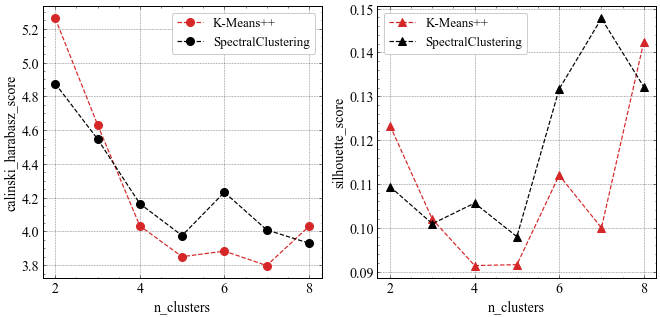

In [87]:
COLOR_LIST = ['tab:red', 'black']
# 绘制聚类效果对比曲线
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(11,5)) #设定画布
for idx, it in enumerate(['K-Means++', 'SpectralClustering']):
    ax1.plot(CH_Score['n_clusters'],CH_Score[it],lw=1.2,marker='o',ms=8,label=it,ls='--',color=COLOR_LIST[idx]) #绘制每一条曲线
    ax2.plot(Sil_Score['n_clusters'],Sil_Score[it],lw=1.2,marker='^',ms=8,label=it,ls='--',color=COLOR_LIST[idx])

ax1.set_xlabel('n_clusters')
ax1.set_ylabel('calinski_harabasz_score')
ax1.legend(fontsize=13, frameon=True, loc='best')

ax2.set_xlabel('n_clusters')
ax2.set_ylabel('silhouette_score')
ax2.legend(fontsize=13, frameon=True, loc='best')  #  ‘upper left’, ‘upper right’, ‘lower left’, ‘lower right’


# ax1.set_xticks([2,3,4,5], [2,3,4,5])
# ax2.set_xticks([2,3,4,5], [2,3,4,5])

plt.savefig('./run/figure/不同聚类方法的轮廓系数值对比', bbox_inches='tight')
plt.show()

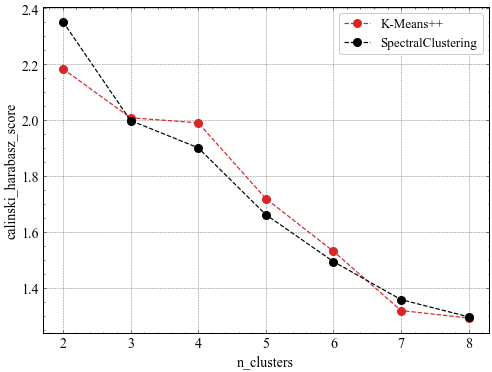

In [88]:
# 绘制聚类效果对比曲线
fig, ax = plt.subplots(1,1,figsize=(8,6)) #设定画布
for idx, it in enumerate(['K-Means++', 'SpectralClustering']):
    ax.plot(DBS_Score['n_clusters'],DBS_Score[it],lw=1.2,marker='o',ms=8,label=it,ls='--',color=COLOR_LIST[idx]) #绘制每一条曲线

ax.set_xlabel('n_clusters')
ax.set_ylabel('calinski_harabasz_score')
ax.legend(fontsize=13, frameon=True, loc='best')

# ax1.set_xticks([2,3,4,5], [2,3,4,5])
# ax2.set_xticks([2,3,4,5], [2,3,4,5])

plt.savefig('./run/figure/不同聚类方法的轮廓系数值对比-', bbox_inches='tight')
plt.show()

### <font color=red><font face="楷体">重点研究k-means++

In [80]:
# 调用scikitplot绘图
def plot_silhouette_of_various_clusters(num_li):
    for i in num_li:
        skplt.metrics.plot_silhouette(PCA_behavior_features,
        SpectralClustering(n_clusters=i, random_state=0, affinity='rbf').fit_predict(PCA_behavior_features),
        figsize=(6,6),title=None)
        plt.xlim(-0.1, 0.5)
        plt.savefig('./run/figure/谱聚类聚类为{}簇时各样本的轮廓系数值'.format(i), bbox_inches='tight')
        plt.show()

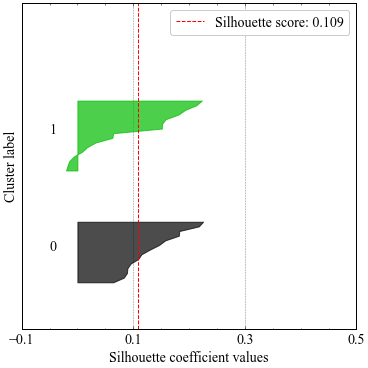

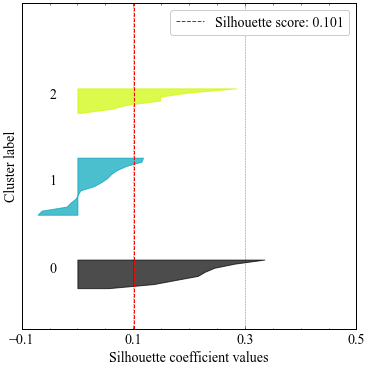

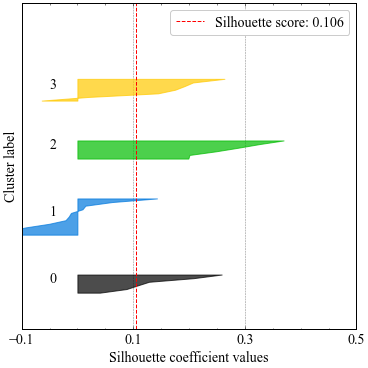

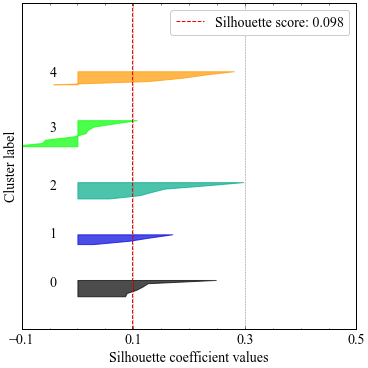

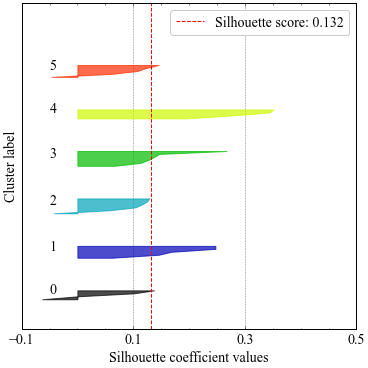

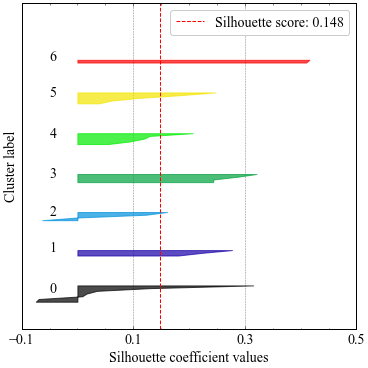

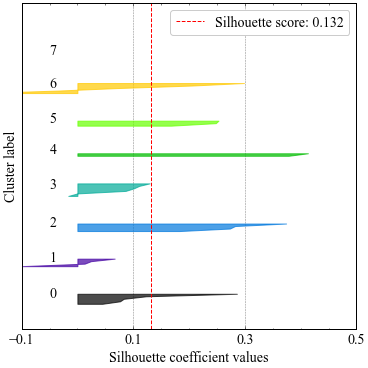

In [81]:
plot_silhouette_of_various_clusters([*range(2, 9)])

### <font color=red><font face="楷体">将聚类后的结果确定为每条数据的label

In [54]:
clusterer = SpectralClustering(n_clusters=4, random_state=0, affinity='rbf').fit_predict(PCA_behavior_features)

pd.Series(clusterer).value_counts()

1    11
3     7
2     6
0     6
dtype: int64

In [55]:
clusterer

array([1, 1, 3, 2, 1, 1, 1, 3, 2, 3, 2, 0, 3, 2, 3, 1, 0, 1, 1, 3, 1, 0,
       0, 0, 2, 0, 2, 1, 3, 1])

In [58]:
df_add_label = pd.concat([df, pd.DataFrame([*clusterer],columns=['Cluster'])],axis=1)
df_add_label

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Cluster
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,6.122449,24.489796,53.061224,91.836735,...,159.183673,142.857143,114.285714,83.673469,44.897959,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,6.183673,25.469388,57.836735,92.755102,...,163.959184,152.857143,115.428571,83.673469,45.346939,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,6.734694,24.734694,54.122449,92.755102,...,173.510204,145.714286,117.714286,83.673469,47.142857,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,6.551020,24.979592,53.061224,93.673469,...,175.102041,148.571429,117.714286,87.020408,48.938776,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,6.673469,25.469388,54.122449,91.836735,...,165.551020,150.000000,123.428571,87.857143,48.489796,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,6.183673,24.489796,54.653061,93.673469,...,170.326531,147.142857,125.714286,87.020408,46.244898,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,6.489796,26.204082,56.244898,93.673469,...,163.959184,145.714286,118.857143,89.530612,44.897959,0.0,0.0,0.0,0.0,3.0
8,0.0,0.0,0.0,0.0,0.0,0.0,6.183673,25.469388,57.306122,99.183673,...,162.367347,142.857143,117.714286,86.183673,48.489796,0.0,0.0,0.0,0.0,2.0
9,0.0,0.0,0.0,0.0,0.0,0.0,6.306122,24.489796,54.653061,95.510204,...,171.918367,145.714286,118.857143,89.530612,47.591837,0.0,0.0,0.0,0.0,3.0


In [59]:
df_add_label.to_csv('df_add_label.csv', index=False, encoding='utf_8_sig')